<a href="https://colab.research.google.com/github/Rob1Ham/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Rob_Hamilton_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd
persons = pd.read_csv('https://github.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv')

In [2]:
persons.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
persons = persons.drop(['Unnamed: 0'], axis=1)
persons.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [14]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


No handles with labels found to put in legend.


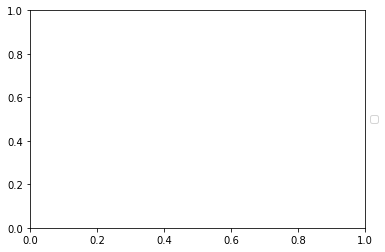

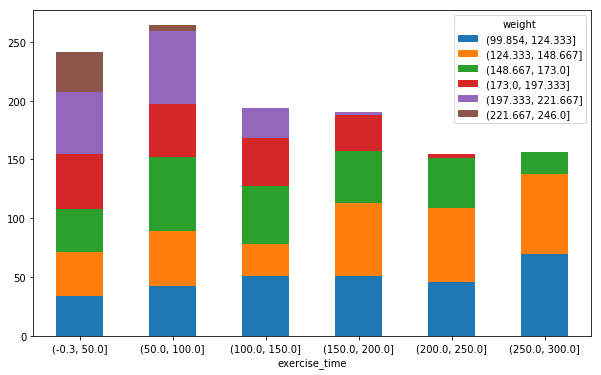

In [70]:
age_bins = pd.cut(persons['age'],6)
weight_bins = pd.cut(persons['weight'],6)
exercise_bins = pd.cut(persons['exercise_time'],6)



ct_we = pd.crosstab(weight_bins,exercise_bins)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ct_we.T.plot(kind='bar', stacked=True, rot=0, figsize=(10,6), legend=True, zorder=3);



In [71]:
ct_ae = pd.crosstab(age_bins,exercise_bins)
ct_ae



exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
age,,,,,,
"(17.938, 28.333]",29,35,33,45,39,28
"(28.333, 38.667]",48,32,29,42,34,32
"(38.667, 49.0]",27,40,25,26,36,46
"(49.0, 59.333]",26,30,29,29,24,46
"(59.333, 69.667]",44,53,33,36,22,4
"(69.667, 80.0]",67,74,45,12,0,0


No handles with labels found to put in legend.


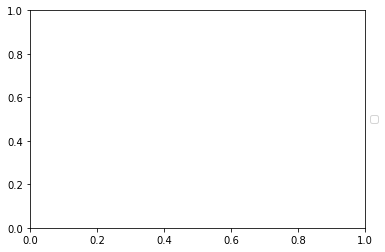

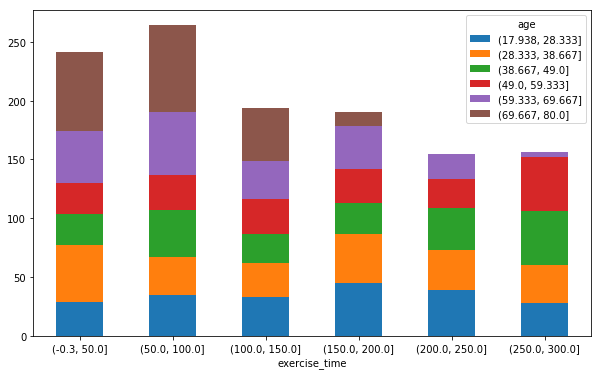

In [72]:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ct_ae.T.plot(kind='bar', stacked=True, rot=0, figsize=(10,6), legend=True, zorder=3);

In [73]:
ct_aw = pd.crosstab(age_bins,weight_bins,normalize='index')
ct_aw

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 28.333]",0.267943,0.272727,0.229665,0.110048,0.095694,0.023923
"(28.333, 38.667]",0.322581,0.225806,0.202765,0.129032,0.101382,0.018433
"(38.667, 49.0]",0.245000,0.320000,0.195000,0.110000,0.105000,0.025000
"(49.0, 59.333]",0.271739,0.271739,0.179348,0.152174,0.119565,0.005435
"(59.333, 69.667]",0.156250,0.250000,0.229167,0.166667,0.151042,0.046875
"(69.667, 80.0]",0.196970,0.181818,0.227273,0.176768,0.141414,0.075758


In [74]:
ea_corr = persons['exercise_time'].corr(persons['age'])
ew_corr = persons['exercise_time'].corr(persons['weight'])
aw_corr = persons['age'].corr(persons['weight'])

print("The correlation between exercise time and age is "+str(ea_corr))
print("The correlation between exercise time and weight is "+str(ew_corr))
print("The correlation between age time and weight is "+str(aw_corr))

The correlation between exercise time and age is -0.2738180438352109
The correlation between exercise time and weight is -0.4780213304385566
The correlation between age time and weight is 0.14416818571376627


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. Exercise time, weight, and age in this dataset are all discrete, since they are rounded to the nearest whole integer. You are either 30 or 31 years old, you can not be 30.5 years old (for this dataset specfically).
2.  Exercise time is negatively correlated with age and weight, meaning that as exercise time increases, it is correlated with younger and lighter people. Age and weight are positively correlated, meaning that as you get older, the heavier you get in this dataset.
3.  There is a real relatiopnship between the amount of time exercising and your age/weight.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)